In [1]:
import os
os.chdir('C:\Users\Administrator\Desktop')
import graphlab
import pandas as pd
import graphlab as gl
import math


A newer version of GraphLab Create (v1.8.5) is available! Your current version is v1.8.3.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [2]:
products = gl.SFrame('amazon_baby.gl/')


[INFO] GraphLab Create v1.8.3 started. Logging: C:\Users\ADMINI~1\AppData\Local\Temp\graphlab_server_1459394303.log.0


In [3]:
products

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


## Build the word count vector for each review

Let us explore a specific example of a baby product.

In [4]:
products[269]

{'name': 'The First Years Massaging Action Teether',
 'rating': 5.0,
 'review': 'A favorite in our house!'}

Now, we will perform 2 simple data transformations:
Remove punctuation using Python's built-in string functionality.
Transform the reviews into word-counts.
Aside. In this notebook, we remove all punctuations for the sake of simplicity. A smarter approach to punctuations would preserve phrases such as "I'd", "would've", "hadn't" and so forth. See this page for an example of smart handling of punctuations.

In [5]:
def remove_punctuation(text):
    import string
    return text.translate(None, string.punctuation)

In [6]:
review_without_punctuation = products['review'].apply(remove_punctuation)

In [7]:
review_without_punctuation

dtype: str
Rows: 183531
['These flannel wipes are OK but in my opinion not worth keeping  I also ordered someImse Vimse Cloth WipesOcean Blue12 countwhich are larger had a nicer softer texture and just seemed higher quality  I use cloth wipes for hands and faces and have been usingThirsties 6 Pack Fab Wipes Boyfor about 8 months now and need to replace them because they are starting to get rough and have had stink issues for a while that stripping no longer handles', 'it came early and was not disappointed i love planet wise bags and now my wipe holder it keps my osocozy wipes moist and does not leak highly recommend it', 'Very soft and comfortable and warmer than it looksfit the full size bed perfectlywould recommend to anyone looking for this type of quilt', 'This is a product well worth the purchase  I have not found anything else like this and it is a positive ingenious approach to losing the binky  What I love most about this product is how much ownership my daughter has in gettin

In [8]:
products = gl.SFrame.read_csv('amazon_baby.csv')

Read 105953 lines. Lines per second: 139593

Finished parsing file C:\Users\Administrator\Desktop\amazon_baby.csv

Parsing completed. Parsed 183531 lines in 0.977018 secs.

------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[str,str,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


In [9]:
products[269]

{'name': 'The First Years Massaging Action Teether',
 'rating': 5L,
 'review': 'A favorite in our house!'}

In [10]:
def remove_punctuation(text):
    import string
    return text.translate(None, string.punctuation) 

review_without_puctuation = products['review'].apply(remove_punctuation)
products['word_count'] = graphlab.text_analytics.count_words(review_without_puctuation)

Now, let us explore what the sample example above looks like after these 2 transformations. Here, each entry in the word_count column is a dictionary where the key is the word and the value is a count of the number of times the word occurs.

In [11]:
products[269]['word_count']

{'a': 1L, 'favorite': 1L, 'house': 1L, 'in': 1L, 'our': 1L}


Extract sentiments
We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment.

In [12]:
products = products[products['rating'] != 3]

In [13]:
len(products)

166752


Extract sentiments

Now, we will assign reviews with a rating of 4 or higher to be positive reviews, while the ones with rating of 2 or lower are negative. For the sentiment column, we use +1 for the positive class label and -1 for the negative class label.

In [14]:
products['sentiment'] = products['rating'].apply(lambda rating : +1 if rating > 3 else -1)
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5,"{'and': 3L, 'love': 1L,'it': 3L, 'highly': 1L, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5,"{'and': 2L, 'quilt': 1L,'it': 1L, 'comfortable': ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5,"{'and': 3L, 'ingenious':1L, 'love': 2L, 'is': ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5,"{'and': 2L, 'all': 2L,'help': 1L, 'cried': 1L, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5,"{'and': 2L, 'cute': 1L,'help': 2L, 'habit': 1L, ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4,"{'shop': 1L, 'be': 1L,'is': 1L, 'bound': 1L, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5,"{'and': 2L, 'all': 1L,'right': 1L, 'able': 1L, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5,"{'and': 1L, 'fantastic':1L, 'help': 1L, 'give': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4,"{'all': 1L, 'standarad':1L, 'another': 1L, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4,"{'all': 2L, 'nannys': 1L,'just': 1L, 'sleep': 2L, ...",1


## Split data into training and test sets

Let's perform a train/test split with 80% of the data in the training set and 20% of the data in the test set. We use seed=1 so that everyone gets the same result.

In [15]:
train_data, test_data = products.random_split(.8, seed=1)
print len(train_data)
print len(test_data)

133416
33336


## Train a sentiment classifier with logistic regression

We will now use logistic regression to create a sentiment classifier on the training data. This model will use the column word_count as a feature and the column sentiment as the target. We will use validation_set=None to obtain same results as everyone else.
Note: This line may take 1-2 minutes.

In [16]:
sentiment_model = graphlab.logistic_classifier.create(train_data,
                                                      target = 'sentiment',
                                                      features=['word_count'],
                                                      validation_set=None)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133416

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 121712

Number of coefficients    : 121713

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy |

+-----------+----------+-----------+--------------+-------------------+

| 1         | 5        | 0.000002  | 2.617062     | 0.840754          |

| 2         | 9        | 3.000000  | 4.022099     | 0.931350          |

| 3         | 10       | 3.000000  | 4.568118     | 0.882046          |

| 4         | 11       | 3.000000  | 5.093131     | 0.954076          |

| 5         | 12       | 3.000000  | 5.627148     | 0.960964          |

| 6         | 13       | 3.000000  | 6.141164     | 0.975033          |

+-----------+----------+-----------+--------------+-------------------+

TERMINATED: Terminated due to numerical difficulties.

This model may not be ideal. To improve it, consider doing one of the following:
(a) Increasing the regularization.
(b) Standardizing the input data.
(c) Removing highly correlated features.
(d) Removing `inf` and `NaN` values in the training data.

In [17]:
sentiment_model

Class                         : LogisticClassifier

Schema
------
Number of coefficients        : 121713
Number of examples            : 133416
Number of classes             : 2
Number of feature columns     : 1
Number of unpacked features   : 121712

Hyperparameters
---------------
L1 penalty                    : 0.0
L2 penalty                    : 0.01

Training Summary
----------------
Solver                        : auto
Solver iterations             : 6
Solver status                 : TERMINATED: Terminated due to numerical difficulties.
Training time (sec)           : 6.6852

Settings
--------
Log-likelihood                : inf

Highest Positive Coefficients
-----------------------------
word_count[mobileupdate]      : 41.9847
word_count[placeid]           : 41.7354
word_count[labelbox]          : 41.151
word_count[httpwwwamazoncomreviewrhgg6qp7tdnhbrefcmcrprcmtieutf8asinb00318cla0nodeid]: 40.0454
word_count[knobskeeping]      : 36.2091

Lowest Negative Coefficients
------------

Aside. You may get an warning to the effect of "Terminated due to numerical difficulties --- this model may not be ideal". It means that the quality metric (to be covered in Module 3) failed to improve in the last iteration of the run. The difficulty arises as the sentiment model puts too much weight on extremely rare words. A way to rectify this is to apply regularization, to be covered in Module 4. Regularization lessens the effect of extremely rare words. For the purpose of this assignment, however, please proceed with the model above.
Now that we have fitted the model, we can extract the weights (coefficients) as an SFrame as follows:

In [18]:
weights = sentiment_model.coefficients
weights.column_names()
weights.head(5)

name,index,class,value,stderr
(intercept),None,1,1.30337080544,None
word_count,recommend,1,0.303815600015,None
word_count,highly,1,1.49183015276,None
word_count,disappointed,1,-3.95748618393,None
word_count,love,1,1.43301685439,None



There are a total of 121713 coefficients in the model. Recall from the lecture that positive weights wj correspond to weights that cause positive sentiment, while negative weights correspond to negative sentiment.
Fill in the following block of code to calculate how many weights are positive ( >= 0). (Hint: The 'value' column in SFrame weights must be positive ( >= 0)).

In [19]:
num_positive_weights = len(weights[weights['value'] >= 0])
num_negative_weights = len(weights[weights['value'] < 0])

print "Number of positive weights: %s " % num_positive_weights
print "Number of negative weights: %s " % num_negative_weights

Number of positive weights: 68419 
Number of negative weights: 53294 


Making predictions with logistic regression
Now that a model is trained, we can make predictions on the test data. In this section, we will explore this in the context of 3 examples in the test dataset. We refer to this set of 3 examples as the sample_test_data.

In [20]:
sample_test_data = test_data[10:13]
print sample_test_data['rating']
sample_test_data

[5L, 2L, 1L]


name,review,rating,word_count,sentiment
Our Baby Girl Memory Book,Absolutely love it andall of the Scripture in ...,5,"{'and': 2L, 'all': 1L,'love': 1L, ...",1
Wall Decor RemovableDecal Sticker - Colorful ...,Would not purchase againor recommend. The decals ...,2,"{'and': 1L, 'wall': 1L,'them': 1L, 'decals': ...",-1
New Style Trailing CherryBlossom Tree Decal ...,Was so excited to getthis product for my baby ...,1,"{'all': 1L, 'money': 1L,'into': 1L, 'it': 3L, ...",-1


In [21]:
sample_test_data[0]['review']

'Absolutely love it and all of the Scripture in it.  I purchased the Baby Boy version for my grandson when he was born and my daughter-in-law was thrilled to receive the same book again.'

We will now make a class prediction for the sample_test_data. The sentiment_model should predict +1 if the sentiment is positive and -1 if the sentiment is negative. Recall from the lecture that the score (sometimes called margin) for the logistic regression model is defined as:
scorei=wTh(xi)
where h(xi) represents the features for example i. We will write some code to obtain the scores using GraphLab Create. For each row, the score (or margin) is a number in the range [-inf, inf].

In [22]:
scores = sentiment_model.predict(sample_test_data, output_type ='margin')
print scores

[6.734619727059727, -5.734130996760582, -14.668460404469036]


## Soft max

In [23]:
from IPython.display import YouTubeVideo
YouTubeVideo('G8eNWzxOgqE')

In [24]:
scores

dtype: float
Rows: 3
[6.734619727059727, -5.734130996760582, -14.668460404469036]

In [25]:
import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

print(softmax(scores))

[  9.99996155e-01   3.84493227e-06   5.06709134e-10]


## Plot softmax curves

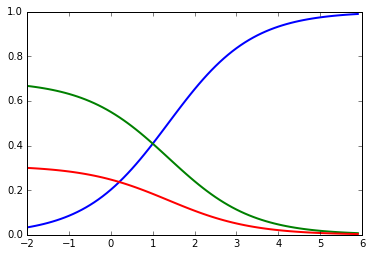

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()

In [54]:
scores = sentiment_model.predict(sample_test_data, output_type ='margin')
print scores

[6.734619727059727, -5.734130996760582, -14.668460404469036]


In [55]:
scores.apply(lambda score : +1 if score > 0 else -1)

dtype: int
Rows: 3
[1L, -1L, -1L]

In [56]:
print "Class predictions according to GraphLab Create:" 
print sentiment_model.predict(sample_test_data)

Class predictions according to GraphLab Create:
[1L, -1L, -1L]



Checkpoint: Make sure your class predictions match with the one obtained from GraphLab Create.
Probability predictions
Recall from the lectures that we can also calculate the probability predictions from the scores using:
P(yi=+1|xi,w)=11+exp(−wTh(xi)).
Using the variable scores calculated previously, write code to calculate the probability that a sentiment is positive using the above formula. For each row, the probabilities should be a number in the range [0, 1].

In [57]:
scores.apply(lambda score: 1/(1 + math.exp(-score)))                    

dtype: float
Rows: 3
[0.9988123848377203, 0.003223268181799639, 4.261557996653217e-07]

In [58]:
print "Class predictions according to GraphLab Create:" 
print sentiment_model.predict(sample_test_data, output_type='probability')

Class predictions according to GraphLab Create:
[0.9988123848377203, 0.0032232681817996375, 4.2615579966532146e-07]



## Find the most positive (and negative) review

We now turn to examining the full test dataset, test_data, and use GraphLab Create to form predictions on all of the test data points for faster performance.
Using the sentiment_model, find the 20 reviews in the entire test_data with the highest probability of being classified as a positive review. We refer to these as the "most positive reviews."
To calculate these top-20 reviews, use the following steps:
Make probability predictions on test_data using the sentiment_model. (Hint: When you call .predict to make predictions on the test data, use option output_type='probability' to output the probability rather than just the most likely class.)
Sort the data according to those predictions and pick the top 20. (Hint: You can use the .topk method on an SFrame to find the top k rows sorted according to the value of a specified column.)

In [59]:
test_data['probability_prediction'] = sentiment_model.predict(test_data, output_type='probability')
test_data.topk('probability_prediction', k=20)['name']

dtype: str
Rows: 20
['Britax Decathlon Convertible Car Seat, Tiffany', 'Ameda Purely Yours Breast Pump - Carry All', 'Traveling Toddler Car Seat Travel Accessory', 'Shermag Glider Rocker Combo, Pecan with Oatmeal', 'Cloud b Sound Machine Soother, Sleep Sheep', 'JP Lizzy Chocolate Ice Classic Tote Set', 'Fisher-Price Rainforest Melodies and Lights Deluxe Gym', "Lilly Gold Sit 'n' Stroll 5 in 1 Car Seat and Stroller Combination, Tuxedo Black (sunshade is not included in the offering)", 'Fisher-Price Deluxe Jumperoo', 'North States Supergate Pressure Mount Clear Choice Wood Gate', 'Munchkin Mozart Magic Cube', 'Britax Marathon Convertible Car Seat, Granite', 'Wizard Convertible Car Seat with LATCH in Midnight Print', 'Capri Stroller - Red Tech', 'Peg Perego Primo Viaggio Car Seat / Infant Carrier with LATCH Base - Black Sable', 'HALO SleepSack Micro-Fleece Wearable Blanket, Soft Pink, Small', 'Leachco Snoogle Total Body Pillow', 'Summer Infant Complete Nursery Care Kit', 'Safety 1st Tot-L

In [60]:

test_data.topk('probability_prediction', k=20, reverse=True)['name']

dtype: str
Rows: 20
['Jolly Jumper Arctic Sneak A Peek Infant Car Seat Cover Black', "Levana Safe N'See Digital Video Baby Monitor with Talk-to-Baby Intercom and Lullaby Control (LV-TW501)", 'Snuza Portable Baby Movement Monitor', 'Fisher-Price Ocean Wonders Aquarium Bouncer', 'VTech Communications Safe &amp; Sounds Full Color Video and Audio Monitor', 'Safety 1st High-Def Digital Monitor', 'Chicco Cortina KeyFit 30 Travel System in Adventure', 'Prince Lionheart Warmies Wipes Warmer', 'Valco Baby Tri-mode Twin Stroller EX- Hot Chocolate', 'Adiri BPA Free Natural Nurser Ultimate Bottle Stage 1 White, Slow Flow (0-3 months)', 'Munchkin Nursery Projector and Sound System, White', 'The First Years True Choice P400 Premium Digital Monitor, 2 Parent Unit', 'Nuby Natural Touch Silicone Travel Infa Feeder, Colors May Vary, 3 Ounce', 'Peg-Perego Tatamia High Chair, White Latte', 'Fisher-Price Royal Potty', 'Safety 1st Exchangeable Tip 3 in 1 Thermometer', 'Safety 1st Lift Lock and Swing Gate', 


## Compute accuracy of the classifier
We will now evaluate the accuracy of the trained classifer. Recall that the accuracy is given by
accuracy=# correctly classified examples# total examples
This can be computed as follows:
Step 1: Use the trained model to compute class predictions (Hint: Use the predict method)
Step 2: Count the number of data points when the predicted class labels match the ground truth labels (called true_labels below).
Step 3: Divide the total number of correct predictions by the total number of data points in the dataset.
Complete the function below to compute the classification accuracy:

In [61]:
def get_classification_accuracy(model, data, true_labels):
    # First get the predictions
    predictions = model.predict(data)
    # Comput the number of correctly classified examples
    total_ex_num = len(data)
    correct_ex_num = 0
    for i in range(total_ex_num):
        if predictions[i] == true_labels[i]: correct_ex_num += 1
    # Then compute accuracy by dividing num_correct by total number of examples
    accuracy = correct_ex_num/total_ex_num
    return accuracy


Now, let's compute the classification accuracy of the sentiment_model on the test_data.

In [62]:
get_classification_accuracy(sentiment_model, test_data, test_data['sentiment'])

0

Learn another classifier with fewer words
There were a lot of words in the model we trained above. We will now train a simpler logistic regression model using only a subet of words that occur in the reviews. For this assignment, we selected a 20 words to work with. These are:

In [63]:
significant_words = ['love', 'great', 'easy', 'old', 'little', 'perfect', 'loves', 
      'well', 'able', 'car', 'broke', 'less', 'even', 'waste', 'disappointed', 
      'work', 'product', 'money', 'would', 'return']

In [64]:
len(significant_words)

20

For each review, we will use the word_count column and trim out all words that are not in the significant_words list above. We will use the SArray dictionary trim by keys functionality. Note that we are performing this on both the training and test set.

In [65]:
train_data['word_count_subset'] = train_data['word_count'].dict_trim_by_keys(significant_words, exclude=False)
test_data['word_count_subset'] = test_data['word_count'].dict_trim_by_keys(significant_words, exclude=False)

In [66]:
train_data[0]['review']

'it came early and was not disappointed. i love planet wise bags and now my wipe holder. it keps my osocozy wipes moist and does not leak. highly recommend it.'

In [67]:
print train_data[0]['word_count']

{'and': 3L, 'love': 1L, 'it': 3L, 'highly': 1L, 'osocozy': 1L, 'bags': 1L, 'leak': 1L, 'moist': 1L, 'does': 1L, 'recommend': 1L, 'was': 1L, 'wipes': 1L, 'disappointed': 1L, 'early': 1L, 'not': 2L, 'now': 1L, 'holder': 1L, 'wipe': 1L, 'keps': 1L, 'wise': 1L, 'i': 1L, 'planet': 1L, 'my': 2L, 'came': 1L}


In [68]:

print train_data[0]['word_count_subset']

{'love': 1L, 'disappointed': 1L}


## Train a logistic regression model on a subset of data

We will now build a classifier with word_count_subset as the feature and sentiment as the target.

In [69]:
simple_model = graphlab.logistic_classifier.create(train_data,
                                                   target = 'sentiment',
                                                   features=['word_count_subset'],
                                                   validation_set=None)
simple_model

Logistic regression:

--------------------------------------------------------

Number of examples          : 133416

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 20

Number of coefficients    : 21

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.169009     | 0.862917          |

| 2         | 3        | 0.274015     | 0.865713          |

| 3         | 4        | 0.380018     | 0.866478          |

| 4         | 5        | 0.488021     | 0.866748          |

| 5         | 6        | 0.595023     | 0.866815          |

| 6         | 7        | 0.706027     | 0.866815          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

Class                         : LogisticClassifier

Schema
------
Number of coefficients        : 21
Number of examples            : 133416
Number of classes             : 2
Number of feature columns     : 1
Number of unpacked features   : 20

Hyperparameters
---------------
L1 penalty                    : 0.0
L2 penalty                    : 0.01

Training Summary
----------------
Solver                        : auto
Solver iterations             : 6
Solver status                 : SUCCESS: Optimal solution found.
Training time (sec)           : 0.736

Settings
--------
Log-likelihood                : 44323.7254

Highest Positive Coefficients
-----------------------------
word_count_subset[loves]      : 1.6773
word_count_subset[perfect]    : 1.5145
word_count_subset[love]       : 1.3654
(intercept)                   : 1.2995
word_count_subset[easy]       : 1.1937

Lowest Negative Coefficients
----------------------------
word_count_subset[disappointed]: -2.3551
word_count_subset[return

In [70]:
get_classification_accuracy(simple_model, test_data, test_data['sentiment'])

0

In [71]:
simple_model.coefficients

name,index,class,value,stderr
(intercept),None,1,1.2995449552,0.0120888541331
word_count_subset,disappointed,1,-2.35509250061,0.0504149888557
word_count_subset,love,1,1.36543549368,0.0303546295109
word_count_subset,well,1,0.504256746398,0.021381300631
word_count_subset,product,1,-0.320555492996,0.0154311321362
word_count_subset,loves,1,1.67727145556,0.0482328275384
word_count_subset,little,1,0.520628636025,0.0214691475665
word_count_subset,work,1,-0.621700012425,0.0230330597946
word_count_subset,easy,1,1.19366189833,0.029288869202
word_count_subset,great,1,0.94469126948,0.0209509926591


In [72]:
simple_model_coeffs = simple_model.coefficients
simple_model_coeffs.sort('value', ascending=False).print_rows(num_rows=21)

+-------------------+--------------+-------+-----------------+-----------------+
|        name       |    index     | class |      value      |      stderr     |
+-------------------+--------------+-------+-----------------+-----------------+
| word_count_subset |    loves     |   1   |  1.67727145556  | 0.0482328275384 |
| word_count_subset |   perfect    |   1   |  1.51448626703  |  0.049861952294 |
| word_count_subset |     love     |   1   |  1.36543549368  | 0.0303546295109 |
|    (intercept)    |     None     |   1   |   1.2995449552  | 0.0120888541331 |
| word_count_subset |     easy     |   1   |  1.19366189833  |  0.029288869202 |
| word_count_subset |    great     |   1   |  0.94469126948  | 0.0209509926591 |
| word_count_subset |    little    |   1   |  0.520628636025 | 0.0214691475665 |
| word_count_subset |     well     |   1   |  0.504256746398 |  0.021381300631 |
| word_count_subset |     able     |   1   |  0.191438302295 | 0.0337581955697 |
| word_count_subset |     ol

Quiz Question: Consider the coefficients of simple_model. There should be 21 of them, an intercept term + one for each word in significant_words. How many of the 20 coefficients (corresponding to the 20 significant_words and excluding the intercept term) are positive for the simple_model?

In [73]:
positive_significant_words = simple_model_coeffs[simple_model_coeffs['value'] > 0]['index']
len(positive_significant_words)

11

Quiz Question: Are the positive words in the simple_model (let us call them positive_significant_words) also positive words in the sentiment_model?

In [74]:
sentiment_model_coeffs = sentiment_model.coefficients

In [75]:
for word in positive_significant_words:
    print word, sentiment_model_coeffs[sentiment_model_coeffs['index'] == word]['value']

None [1.3033708054361548, ... ]
love [1.4330168543926436, ... ]
well [0.6279648775667654, ... ]
loves [1.5664851756954374, ... ]
little [0.6741624574993753, ... ]
easy [1.2134693782159167, ... ]
great [1.3145924503858717, ... ]
able [0.17433127255185954, ... ]
perfect [1.751901143919869, ... ]
old [0.009122301136688271, ... ]
car [0.1952636706177359, ... ]


## Comparing models

We will now compare the accuracy of the sentiment_model and the simple_model using the get_classification_accuracy method you implemented above.

In [76]:
get_classification_accuracy(sentiment_model, train_data, train_data['sentiment'])

0

In [81]:
get_classification_accuracy(simple_model, train_data, train_data['sentiment'])

0

In [82]:
get_classification_accuracy(sentiment_model, test_data, test_data['sentiment'])

0

In [83]:

get_classification_accuracy(simple_model, test_data, test_data['sentiment'])

0


## Baseline: Majority class prediction

It is quite common to use the majority class classifier as the a baseline (or reference) model for comparison with your classifier model. The majority classifier model predicts the majority class for all data points. At the very least, you should healthily beat the majority class classifier, otherwise, the model is (usually) pointless.
What is the majority class in the train_data?

In [84]:
num_positive  = (train_data['sentiment'] == +1).sum()
num_negative = (train_data['sentiment'] == -1).sum()
print num_positive
print num_negative
print (num_positive/(num_positive + num_negative))

112164
21252
0


In [53]:
num_positive  = (test_data['sentiment'] == +1).sum()
num_negative = (test_data['sentiment'] == -1).sum()
print num_positive
print num_negative
print (num_positive/(num_positive + num_negative))

28095
5241
0
